In [1]:
%matplotlib inline
import numpy as np
import diffimTests as dit

import warnings
warnings.filterwarnings('ignore')

Using flux=620 for SNR=5 (see cell #4 of notebook '30. 4a. other psf models-real PSFs')

In [2]:
n_runs = 100
testResults1 = dit.multi.runMultiDiffimTests(varSourceFlux=620., n_runs=n_runs)
testResults2 = dit.multi.runMultiDiffimTests(varSourceFlux=620.*np.sqrt(2.), n_runs=n_runs, 
                                             templateNoNoise=False)
testResults3 = dit.multi.runMultiDiffimTests(varSourceFlux=620.*np.sqrt(2.), n_runs=n_runs, 
                                             templateNoNoise=False, skyLimited=False)

RUNNING: 10
CORES: 3


[Parallel(n_jobs=None)]: Done   1 out of   1 | elapsed:    7.9s remaining:    0.0s
[Parallel(n_jobs=None)]: Done  10 out of  10 | elapsed:  1.3min finished


RUNNING: 10
CORES: 3


[Parallel(n_jobs=None)]: Done   1 out of   1 | elapsed:    8.9s remaining:    0.0s
[Parallel(n_jobs=None)]: Done  10 out of  10 | elapsed:  1.5min finished


RUNNING: 10
CORES: 3


[Parallel(n_jobs=None)]: Done   1 out of   1 | elapsed:    8.5s remaining:    0.0s
[Parallel(n_jobs=None)]: Done  10 out of  10 | elapsed:  1.4min finished


In [3]:
dit.dumpObjects((testResults1, testResults2, testResults3), 'tmp_pkl')

In [8]:
#testResults1, testResults2, testResults3 = dit.loadObjects('tmp_pkl')
import cPickle, gzip
testResults1, testResults2, testResults3=cPickle.load(gzip.GzipFile('tmp_pkl' + '.gz', 'rb'))

FN: 
ALstack           28.7
ALstack_decorr    30.0
SZOGY             34.3
ZOGY              31.1
dtype: float64
FP: 
ALstack           4.3
ALstack_decorr    4.1
SZOGY             5.9
ZOGY              4.2
dtype: float64
TP: 
ALstack           21.3
ALstack_decorr    20.0
SZOGY             15.7
ZOGY              18.9
dtype: float64


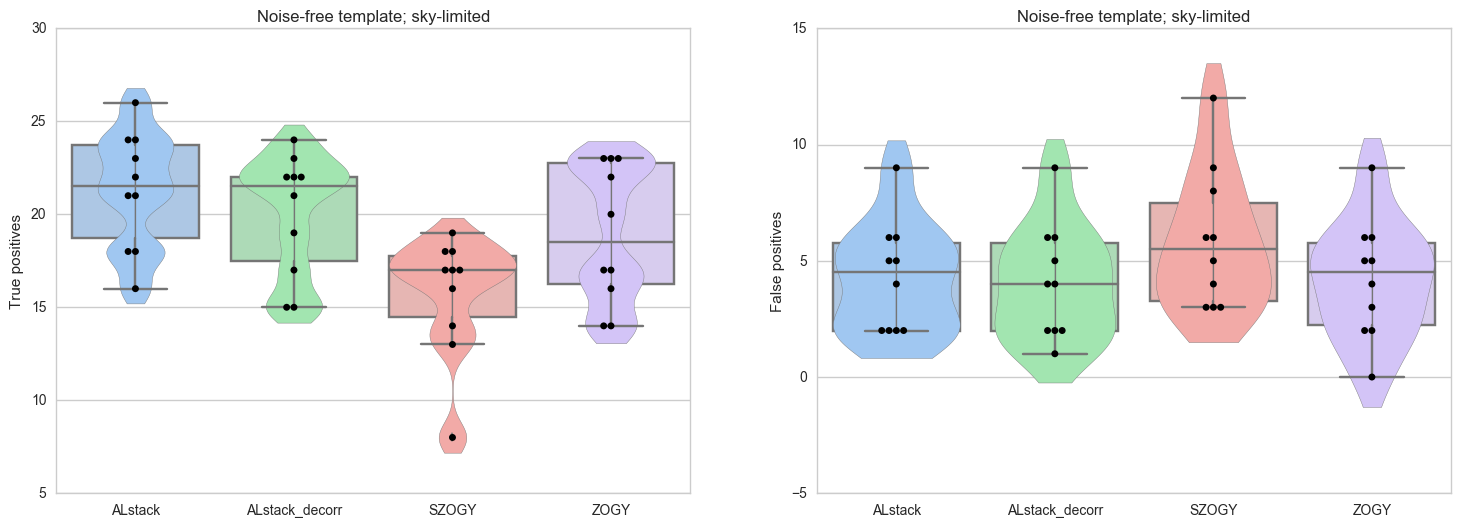

In [9]:
dit.multi.plotResults(testResults1, title='Noise-free template; sky-limited');

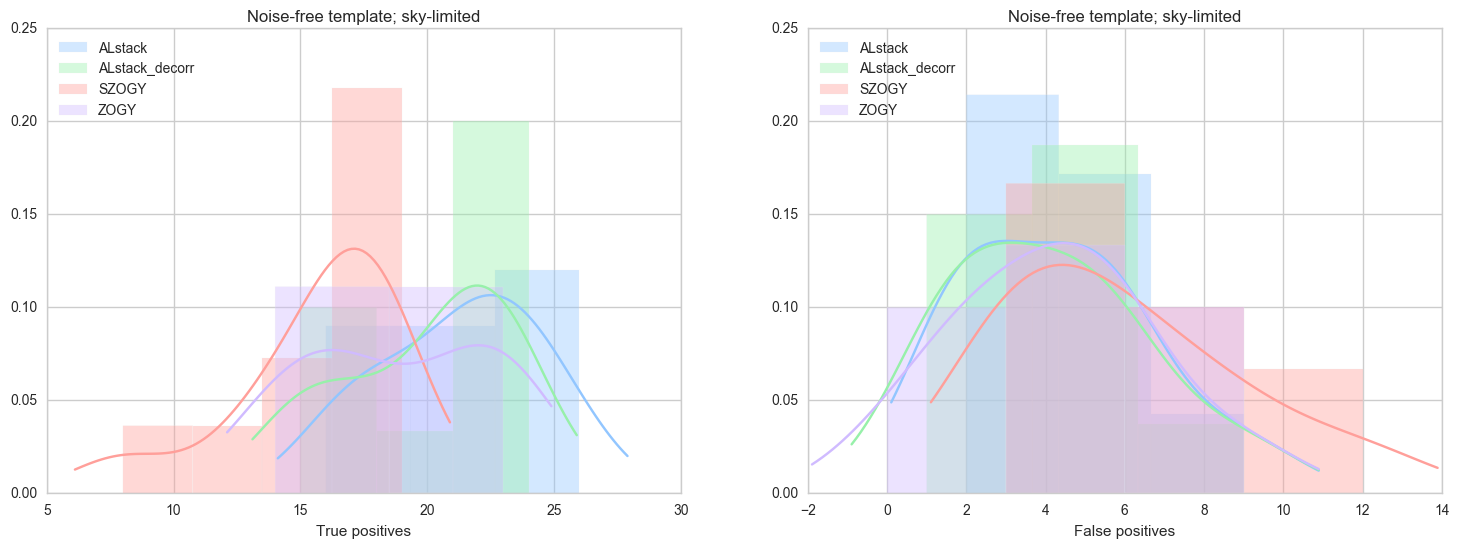

In [10]:
dit.multi.plotResults(testResults1, title='Noise-free template; sky-limited', asHist=True, doPrint=False);

Noise-free template; sky-limited :
AL:		5.09777798151 +/- 1.02217564739
AL(decorr):	5.09219894639 +/- 1.01518828401
ZOGY:		5.04335879639 +/- 1.02031292236


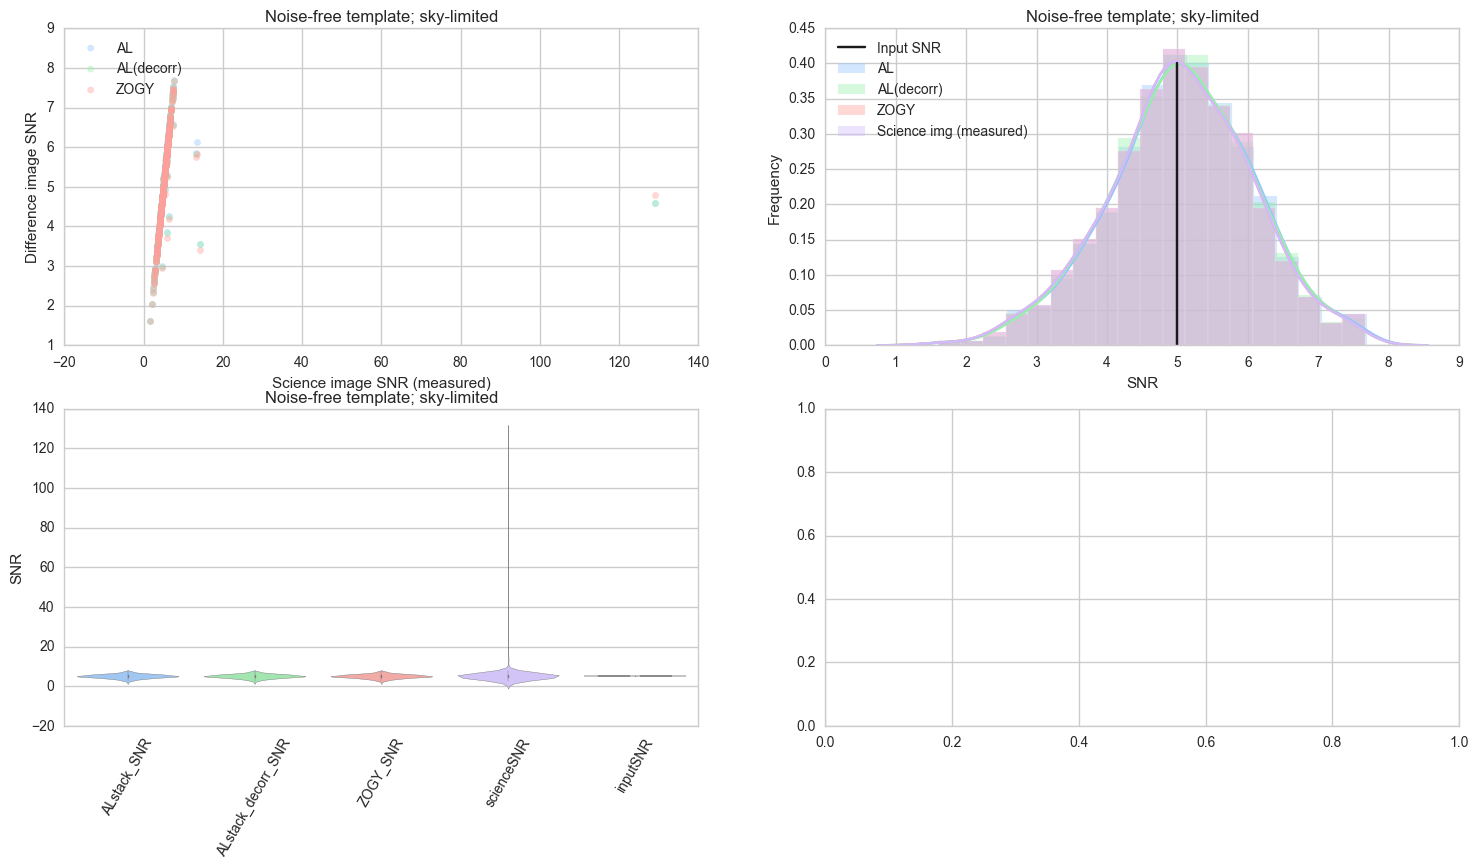

In [11]:
dit.multi.plotSnrResults(testResults1, title='Noise-free template; sky-limited');

FN: 
ALstack           19.6
ALstack_decorr    21.4
SZOGY             28.5
ZOGY              23.2
dtype: float64
FP: 
ALstack           5.0
ALstack_decorr    5.0
SZOGY             7.5
ZOGY              4.2
dtype: float64
TP: 
ALstack           30.4
ALstack_decorr    28.6
SZOGY             21.5
ZOGY              26.8
dtype: float64


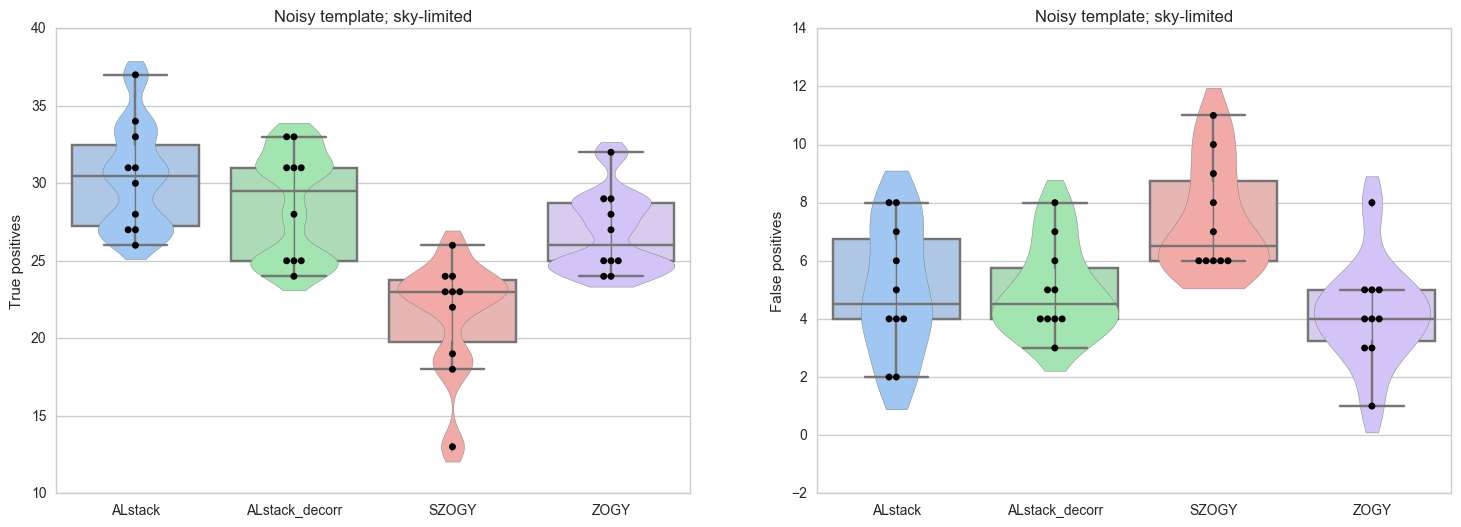

In [12]:
dit.multi.plotResults(testResults2, title='Noisy template; sky-limited');

Noisy template; sky-limited :
AL:		7.06125561545 +/- 1.29854046297
AL(decorr):	5.24293350432 +/- 0.961545636596
ZOGY:		5.49137080348 +/- 1.02789850474


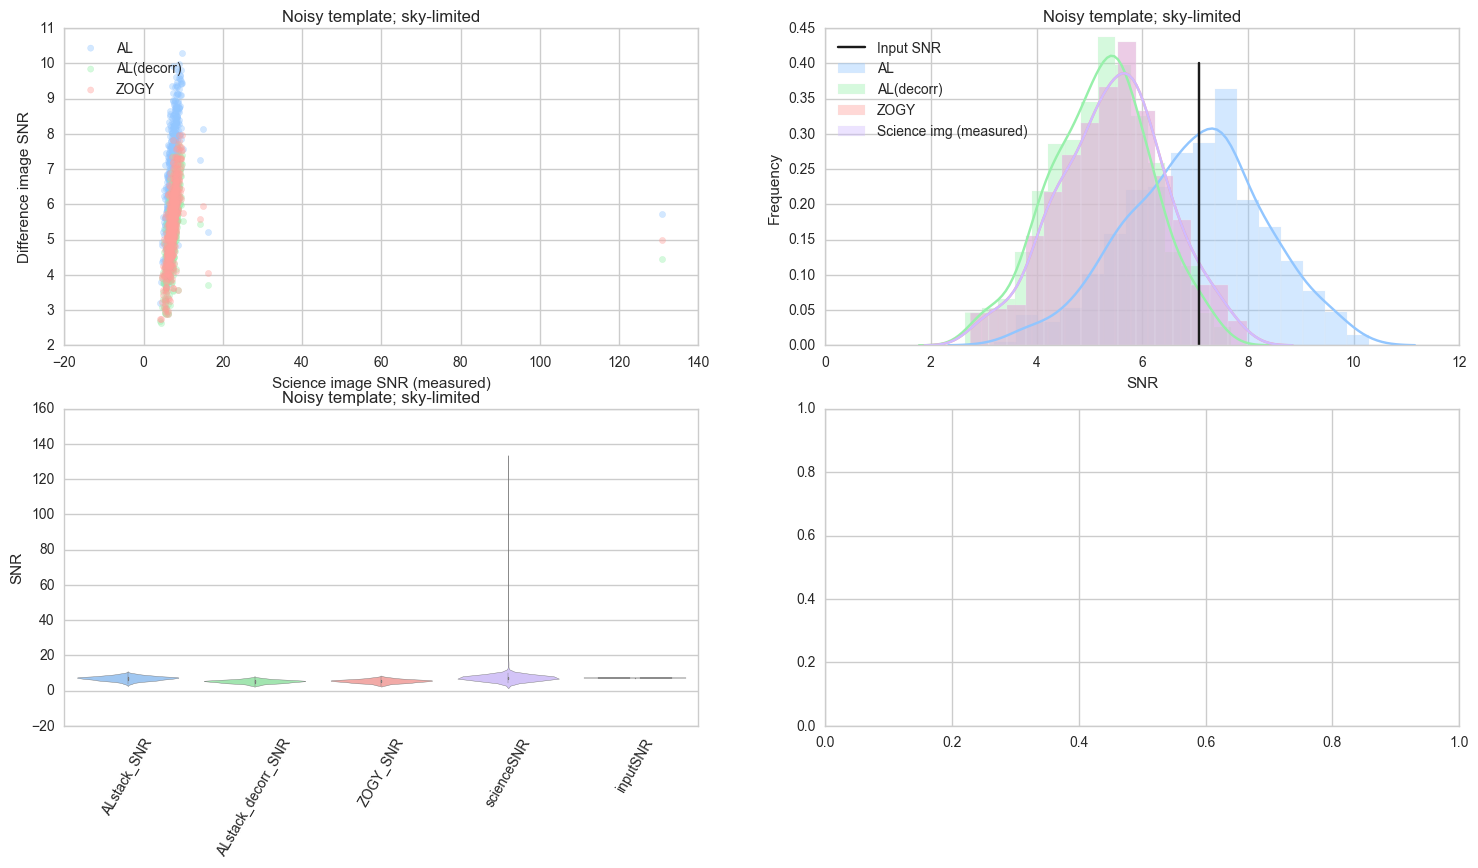

In [13]:
dit.multi.plotSnrResults(testResults2, title='Noisy template; sky-limited');

FN: 
ALstack           19.0
ALstack_decorr    20.4
SZOGY             29.8
ZOGY              22.6
dtype: float64
FP: 
ALstack           6.3
ALstack_decorr    7.0
SZOGY             7.4
ZOGY              4.2
dtype: float64
TP: 
ALstack           31.0
ALstack_decorr    29.6
SZOGY             20.2
ZOGY              27.4
dtype: float64


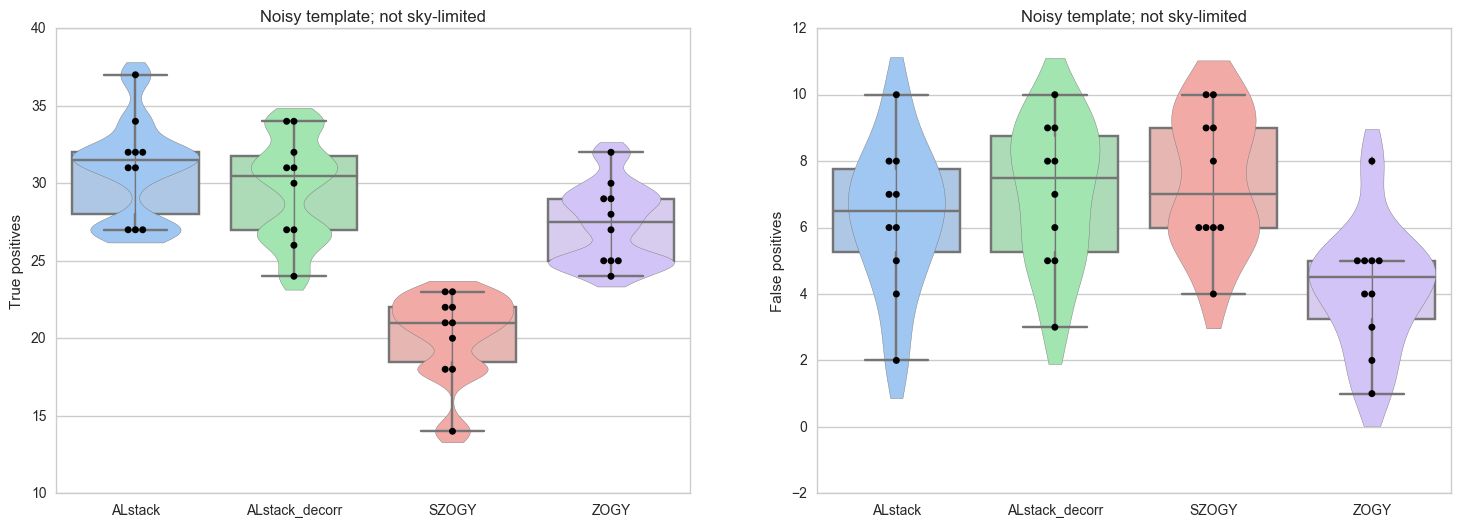

In [14]:
dit.multi.plotResults(testResults3, title='Noisy template; not sky-limited');

Noisy template; not sky-limited :
AL:		6.83502248441 +/- 1.23701974031
AL(decorr):	5.08700499549 +/- 0.918886396829
ZOGY:		5.38007401597 +/- 1.01147537817


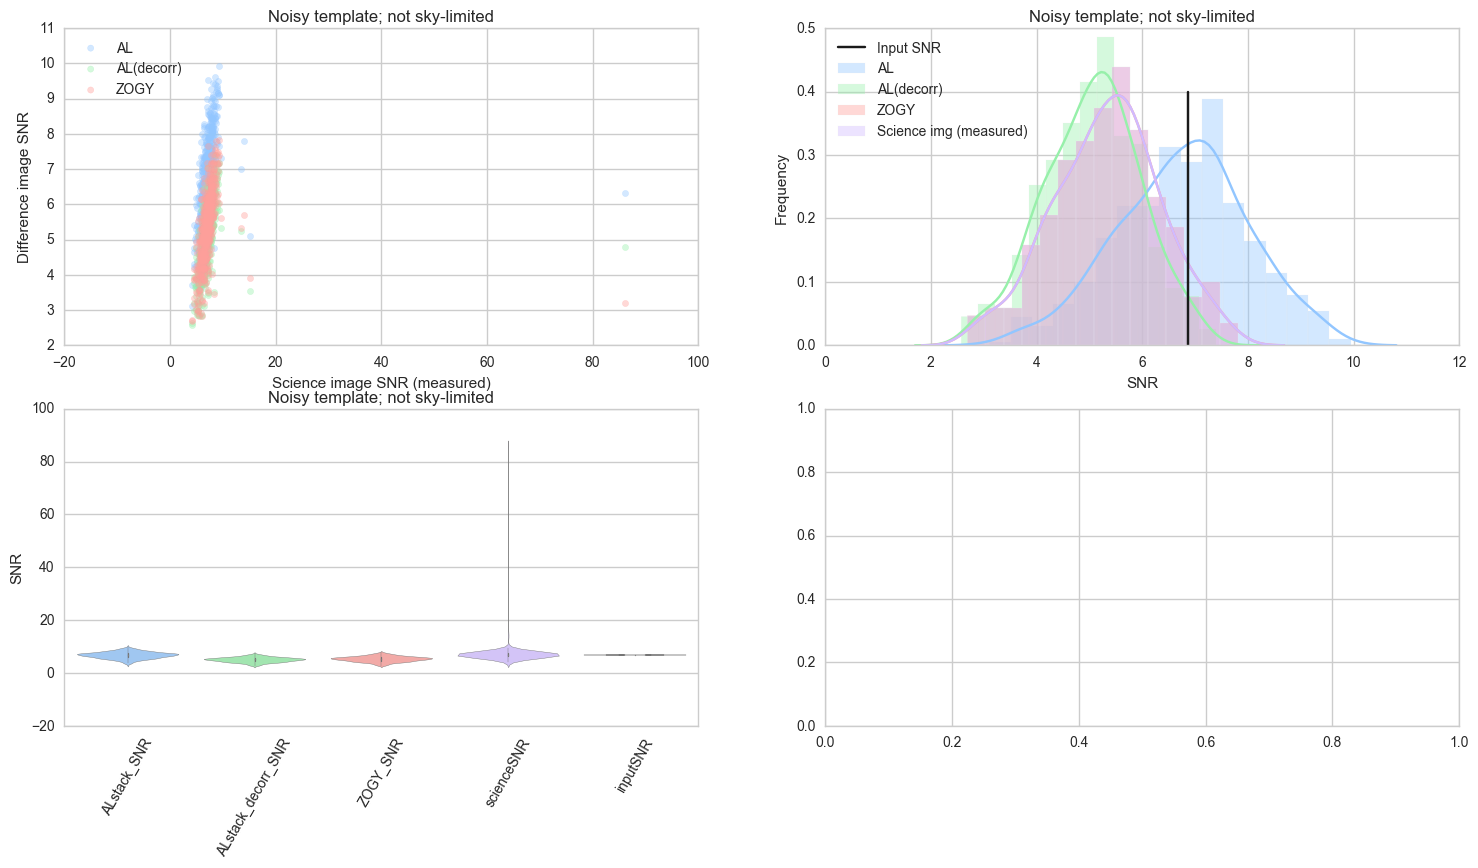

In [15]:
dit.multi.plotSnrResults(testResults3, title='Noisy template; not sky-limited');

#### Figure out what is up with the runs where `ALstack` is performing poorly.

/Users/dreiss/lsstsw/miniconda/lib/python2.7/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


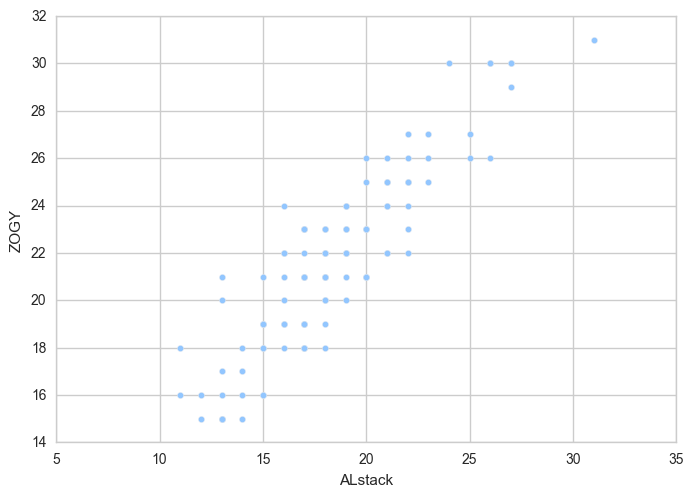

In [3]:
TP, FP, FN = dit.multi.plotResults(testResults1, title='Noise-free template; sky-limited', 
                                   actuallyPlot=False, doPrint=False)
TP.plot.scatter('ALstack', 'ZOGY')

In [4]:
print np.max(TP.ZOGY/TP.ALstack)
TP[TP.ZOGY/TP.ALstack > 1.6]

1.63636363636


,ALstack,ALstack_decorr,SZOGY,ZOGY
34,11,11,14,18
55,13,12,14,21


In [1]:
%matplotlib inline
import numpy as np
import diffimTests as dit

In [2]:
varSourceFlux = 620.
n_runs = 100
inputs = [(f, seed) for f in [varSourceFlux] for seed in np.arange(66, 66+n_runs, 1)]
i = inputs[55]
res = dit.multi.runTest(flux=i[0], seed=i[1], returnObj=True)
print {key+': '+str(res[key]) for key in ['ALstack', 'ZOGY', 'SZOGY', 'ALstack_decorr']}
testObj = res['obj']

set(["ALstack: {'FP': 6, 'FN': 23, 'TP': 27}", "SZOGY: {'FP': 6, 'FN': 29, 'TP': 21}", "ALstack_decorr: {'FP': 5, 'FN': 24, 'TP': 26}", "ZOGY: {'FP': 5, 'FN': 27, 'TP': 23}"])


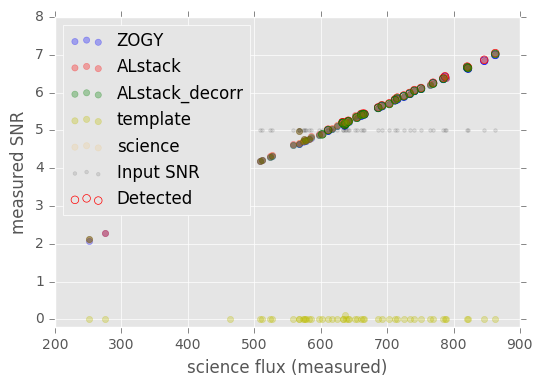

In [7]:
import matplotlib.pyplot as plt
testObj.doPlotWithDetectionsHighlighted(transientsOnly=True, addPresub=True, xaxisIsScienceForcedPhot=True,
                                        skyLimited=True, alpha=0.3);
plt.xlim(200, 900)
plt.ylim(-0.2, 8.);

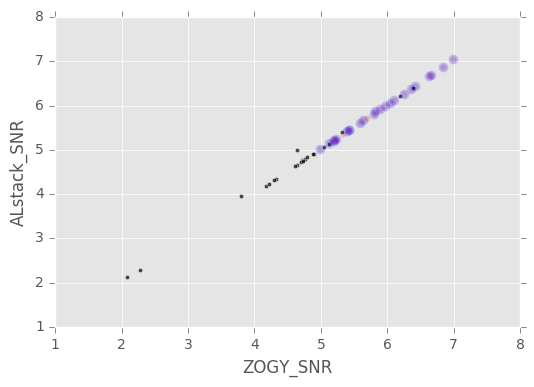

In [4]:
df = res['df']
#colors = np.repeat('k', df.shape[0])
#colors[df.ALstack_detected.values == True] = 'r'
#colors[df.ZOGY_detected.values == True] = 'g'
#colors[(df.ALstack_detected.values == True) & (df.ZOGY_detected.values == True)] = 'b'
#print colors
#print df.ALstack_detected.values
#print df.ALstack_detected.sum()
    
ax = df[df.ALstack_detected == True].plot.scatter('ZOGY_SNR', 'ALstack_SNR', c='r', alpha=0.2)
df[df.ALstack_detected == False].plot.scatter('ZOGY_SNR', 'ALstack_SNR', c='k', s=10, alpha=0.7, ax=ax)
df[df.ZOGY_detected == True].plot.scatter('ZOGY_SNR', 'ALstack_SNR', c='b', s=50, alpha=0.2, ax=ax)
#plt.xlim(3.5, 7.);
#plt.ylim(3.5, 7.);

In [5]:
tmp = df[(df.ZOGY_detected == False) & (df.ALstack_detected == False) & (df.ZOGY_SNR > 5.5)]
dit.sizeme(tmp)

,inputFlux,templateFlux,scienceFlux,inputId,inputCentroid_x,inputCentroid_y,inputSNR,ZOGY_SNR,ZOGY_flux,ZOGY_fluxSigma,...,ALstack_SNR,ALstack_flux,ALstack_fluxSigma,ALstack_detected,ALstack_decorr_SNR,ALstack_decorr_flux,ALstack_decorr_fluxSigma,ALstack_decorr_detected,templateSNR,scienceSNR
42,620.0,6.071454e-08,788.753357,43,189.627638,46.424352,4.999184,6.386051,45.407440,7.110410,...,6.396095,789.023362,123.360164,False,NaN,NaN,NaN,False,8.926692e-09,6.395141
44,620.0,1.749857e-05,764.878990,45,212.707765,326.679917,4.999184,6.192564,44.024755,7.109294,...,6.213118,765.557457,123.216307,False,6.195194,765.365833,123.541863,False,2.009080e-06,6.209256


A&L(dec): (-0.52550948, 16.612017, -58.161186, 60.120415)
ZOGY: (0.0057287345650287929, 0.98841544688988447, -4.2719848328957637, 4.4448720468382659)
A&L(dec) - ZOGY: (0.038980623366332776, 0.032396616271240644, -0.076222282306825928, 0.15494677853992833)


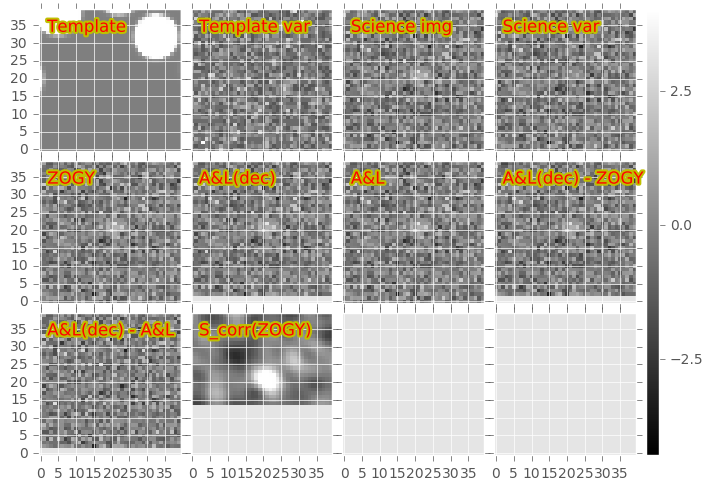

In [7]:
testObj.doPlot([tmp.inputCentroid_y.values[0], tmp.inputCentroid_x.values[0], 20], include_Szogy=True);

In [9]:
tmp = df[(df.ZOGY_detected == False) & (df.ALstack_detected == True)]
dit.sizeme(tmp)

,inputFlux,templateFlux,scienceFlux,inputId,inputCentroid_x,inputCentroid_y,inputSNR,ZOGY_SNR,ZOGY_flux,ZOGY_fluxSigma,...,ALstack_SNR,ALstack_flux,ALstack_fluxSigma,ALstack_detected,ALstack_decorr_SNR,ALstack_decorr_flux,ALstack_decorr_fluxSigma,ALstack_decorr_detected,templateSNR,scienceSNR
5,620.0,3.396490e-09,654.359475,6,422.678819,246.560732,4.999184,5.336667,37.649329,7.054840,...,5.352029,654.494660,122.289076,True,5.334540,654.074208,122.611176,True,4.023084e-10,5.352287
28,620.0,-6.190669e-08,703.386085,29,461.129847,273.022554,4.999184,5.694364,40.485375,7.109727,...,5.714324,704.362251,123.262571,True,5.697247,704.116816,123.588958,True,-7.812954e-09,5.707804
34,620.0,7.272015e-12,637.571542,35,228.017812,303.498343,4.999184,5.168945,36.716275,7.103243,...,5.182555,637.724797,123.052192,True,5.171213,638.017505,123.378705,True,8.078992e-13,5.182863
38,620.0,-1.832931e-08,642.001187,39,321.139164,59.833273,4.999184,5.232242,36.957723,7.063458,...,5.250462,642.443609,122.359436,True,5.236918,642.478917,122.682632,True,-2.009456e-09,5.248428


A&L(dec): (0.91883248, 17.378113, -47.156857, 65.153725)
ZOGY: (0.0057287345650287929, 0.98841544688988447, -4.2719848328957637, 4.4448720468382659)
A&L(dec) - ZOGY: (-0.041464984132446168, 0.013603405846480171, -0.092239472998309591, 0.0082806210285282233)


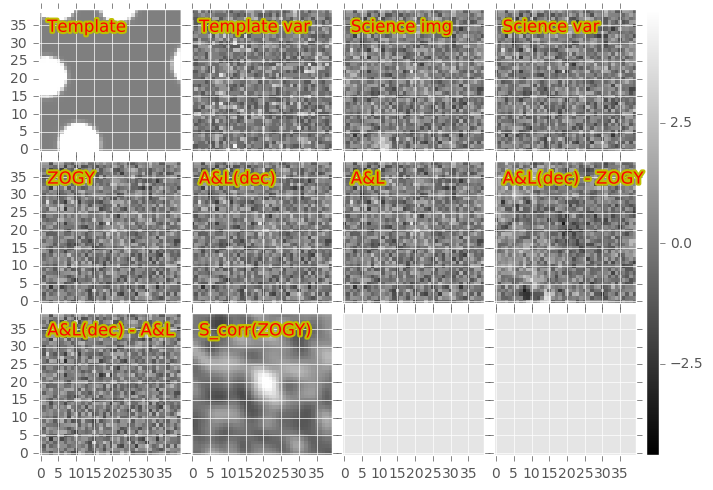

In [10]:
testObj.doPlot([tmp.inputCentroid_y.values[0], tmp.inputCentroid_x.values[0], 20], include_Szogy=True);

This is just to show boundary issues:

A&L(dec): (0.37011325, 17.648075, -66.179611, 67.017548)
ZOGY: (0.0057287345650287929, 0.98841544688988447, -4.2719848328957637, 4.4448720468382659)
A&L(dec) - ZOGY: (-0.0085562366621841288, 0.031046496198700604, -0.30439417723861562, 0.23613634348243939)


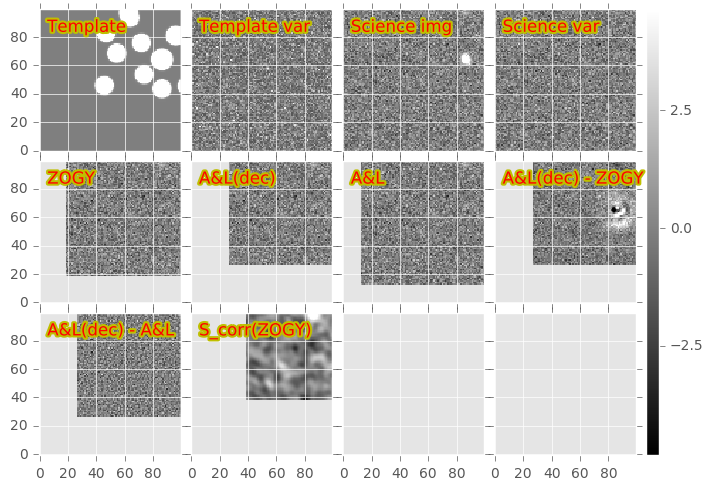

In [11]:
testObj.doPlot([51, 51, 50], include_Szogy=True);